In [1]:
import gdal
import numpy as np
from matplotlib.pyplot import imread
import numpy as np
from skimage import io
import scipy.stats
import os
#img = io.imread('image.png', as_gray=True)
import pandas as pd
input_path100="E:/Thesis/Data/roads/"
input_path50="E:/Thesis/Data/roads1/"
input_path200="E:/Thesis/Data/roads2/"
table={}
table['spearmanrC']=list()
#table['pearsonrP']=list()
#table['kendalltauP']=list()
#table['spearmanrP']=list()
table['ran']=list()

In [2]:
t1={}
t1['range']=list()
for i in range(-100,101,1):
    t1['range'].append(i*0.01)
print(t1['range'])
#print(len(t1['freq']))
#print(len(t1['range']))

[-1.0, -0.99, -0.98, -0.97, -0.96, -0.9500000000000001, -0.9400000000000001, -0.93, -0.92, -0.91, -0.9, -0.89, -0.88, -0.87, -0.86, -0.85, -0.84, -0.8300000000000001, -0.8200000000000001, -0.81, -0.8, -0.79, -0.78, -0.77, -0.76, -0.75, -0.74, -0.73, -0.72, -0.71, -0.7000000000000001, -0.6900000000000001, -0.68, -0.67, -0.66, -0.65, -0.64, -0.63, -0.62, -0.61, -0.6, -0.59, -0.58, -0.5700000000000001, -0.56, -0.55, -0.54, -0.53, -0.52, -0.51, -0.5, -0.49, -0.48, -0.47000000000000003, -0.46, -0.45, -0.44, -0.43, -0.42, -0.41000000000000003, -0.4, -0.39, -0.38, -0.37, -0.36, -0.35000000000000003, -0.34, -0.33, -0.32, -0.31, -0.3, -0.29, -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21, -0.2, -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11, -0.1, -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 

In [3]:
def TestAndAppend(Image_x,Image_y):
    SC,SP=scipy.stats.kendalltau(Image_x, Image_y)
    table['spearmanrC'].append(SC)
    if(np.isnan(SC)):
        table['ran'].append(-2.0)
    else:
        for j in range (202):
            if(SC<t1['range'][j]):
                table['ran'].append((t1['range'][j]))
                break

In [4]:
def DF(table):
    df=pd.DataFrame.from_dict(table)
    print(df.shape)
    print(df.describe())
    print(df.head())
    return df
def HIST_null(df):
    df.ran.hist()
    df1=df.groupby('ran').size().reset_index(name='Size')
    return df1
def HIST(df):
    df=df.drop(df.index[0])
    df.ran.hist()
    return df


In [5]:
def TEST(x,input_path):
    for i in range(0,1101,x):
         for j in range(0,1401,x):
            Image_x  = io.imread(input_path+"tile_"+str(i)+"_"+str(j)+".tif",as_gray=True)
            Image_y = io.imread(input_path+"gtile_"+str(i)+"_"+str(j)+".tif",as_gray=True)
            TestAndAppend(Image_x,Image_y)

In [6]:
TEST(50,input_path50)

(667, 2)
       spearmanrC         ran
count  316.000000  667.000000
mean     0.280794   -0.917166
std      0.178364    1.148639
min     -0.105450   -2.000000
25%      0.173140   -2.000000
50%      0.275081   -2.000000
75%      0.362531    0.270000
max      0.999600    1.000000
   spearmanrC   ran
0         NaN -2.00
1         NaN -2.00
2    0.318920  0.32
3    0.310956  0.32
4    0.624864  0.63


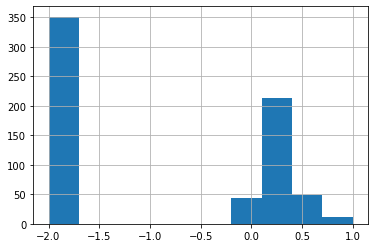

In [7]:
#df.pearsonrC.hist()
df=DF(table)
df51=HIST_null(df)


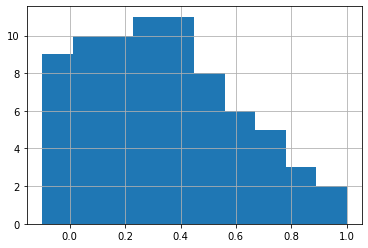

In [8]:
df52=HIST(df51)

In [9]:
table['spearmanrC'].clear()
table['ran'].clear()
TEST(100,input_path100)

(180, 2)
       spearmanrC         ran
count  104.000000  180.000000
mean     0.288131   -0.675167
std      0.156083    1.141862
min      0.014909   -2.000000
25%      0.187722   -2.000000
50%      0.270453    0.155000
75%      0.343063    0.290000
max      0.801089    0.810000
   spearmanrC   ran
0    0.431900  0.44
1    0.147390  0.15
2    0.503387  0.51
3    0.648985  0.65
4    0.252608  0.26


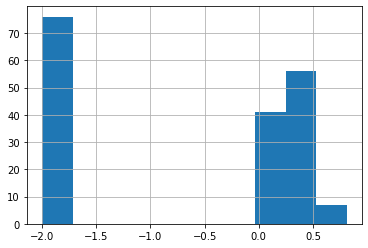

In [10]:
df100=DF(table)
df101=HIST_null(df100)

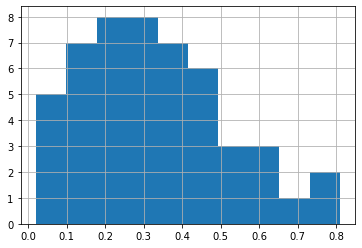

In [11]:
df102=HIST(df101)

In [12]:
table['spearmanrC'].clear()
table['ran'].clear()
TEST(200,input_path200)

(48, 2)
       spearmanrC        ran
count   34.000000  48.000000
mean     0.269809  -0.388958
std      0.093971   1.047740
min      0.064391  -2.000000
25%      0.221907  -2.000000
50%      0.257506   0.235000
75%      0.321925   0.295000
max      0.468933   0.470000
   spearmanrC   ran
0    0.246519  0.25
1    0.322462  0.33
2    0.243777  0.25
3    0.441468  0.45
4    0.458870  0.46


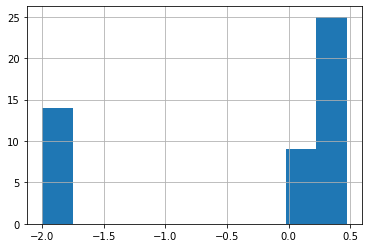

In [13]:
df200=DF(table)
df201=HIST_null(df200)

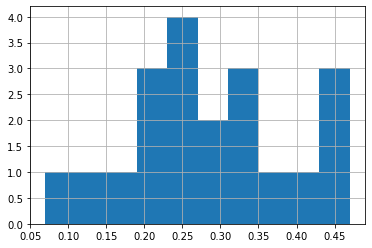

In [14]:
df202=HIST(df201)


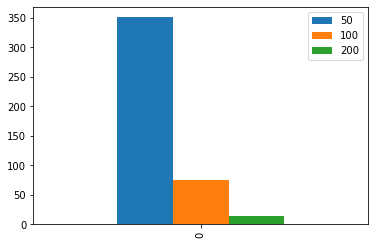

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
a=df51['Size'].iloc[0]
b=df101['Size'].iloc[0]
c=df201['Size'].iloc[0]
d =[ {
  "50": a,
  "100":b,
  "200":c
}]
pd.DataFrame(d, index=[0]).plot(kind='bar')
plt.show()





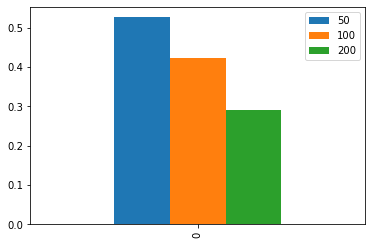

In [30]:
d1 =[ {
  "50": 0.5262,
  "100":0.4222,
  "200":0.2916
}]
pd.DataFrame(d1, index=[0]).plot(kind='bar')
plt.show()





